In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd
import time

In [45]:
# 크롬 브라우저를 열기

DRIVER_DIR = '../driver/chromedriver'
driver = webdriver.Chrome(DRIVER_DIR)

## 특정 카테고리 내에서 크롤링하기 : div단위로 가져오기

In [189]:
# url 접속하기

url = "https://outschool.com/online-classes"
#url = "https://outschool.com/online-classes/coding-tech"
driver.get(url)

In [ ]:
# 전체 페이지를 가져오기 

html = driver.page_source
bsObject = BeautifulSoup(html, 'lxml')

In [121]:
# 셀레니움으로 가져오기

# 가격 가져오기
price_raw = []
prices = driver.find_elements_by_class_name('css-13vx15s')
for p in prices:
    price_raw.append(p.text)

# 리뷰 / 타이틀 / 나이 가져오기
data = []

datas = driver.find_elements_by_class_name('css-67ekna-Flex')

for d in datas:
    data.append(d.text)
    
print(data)
print(price)



['311\nPlay the Stock Market Investing Game! Beginners- Learn...\nAges 9-13', '204\nHow To Make Awesome Animated Movies (Intro to Animation)\nAges 10-15', '141\nBeginner Reading-From Phonics to Fluency\nAges 5-8', '143\nFlexible Schedule: Smartest Artists: Art Class With A...\nAges 4-9', '261\nMetrocraft: Our Class Creates and Governs a Minecraft City!\nAges 9-13', '269\nSTEM CL1D: Electrical Circuits Level 1 - Learn with Snap...\nAges 6-9', '171\nBeginning Multiplication Facts Made Easy!\nAges 8-9', '226\nForensic Science\nAges 11-16', '98\nBlack History From a Decolonized Perspective (African...\nAges 9-14', '427\nLearn to Debate - Introductory Argumentation in 5 Classes\nAges 9-14', '531\nElementary Explorers: Rocks, Fossils, and Crystals\nAges 5-8', '453\nPersonal Responsibility: Owning Behaviors to Earn Freedom\nAges 10-15', '159\nMiddle School Speech & Debate Camp I (Beginners)\nAges 10-15', '336\nIntroduction to Veterinary / Vet Medicine. (8-12 Years)\nAges 8-12', '177\nUndersta

In [131]:
# 데이터프레임으로 묶기

zippedList = list(zip(price, data))
df= pd.DataFrame(zippedList, columns = ['price_raw', 'data'])

df.head(10)

,price_raw,data
0,$18/class,311\nPlay the Stock Market Investing Game! Beg...
1,$40/class,204\nHow To Make Awesome Animated Movies (Intr...
2,$23/class,141\nBeginner Reading-From Phonics to Fluency\...
3,$7/week,143\nFlexible Schedule: Smartest Artists: Art ...
4,$22/class,261\nMetrocraft: Our Class Creates and Governs...
5,$20/class,269\nSTEM CL1D: Electrical Circuits Level 1 - ...
6,$19/class,171\nBeginning Multiplication Facts Made Easy!...
7,$13/class,226\nForensic Science\nAges 11-16
8,$18/class,98\nBlack History From a Decolonized Perspecti...
9,$25/class,427\nLearn to Debate - Introductory Argumentat...


## 카테고리별 한번씩 들어가서 크롤링하기 / 카드뷰

In [3]:
df = pd.DataFrame(columns=['category','price_raw','data'])

In [6]:
# 목표 페이지 불러오기
index = "https://outschool.com/online-classes/" 

theme_list = ["arts"]
#theme_list = ["arts","coding-tech","english","health-wellness","life-skills","math","music","science-nature", "social-studies", "world-languages"]



for i in theme_list:
    url = index + i
    driver.get(url)
    
    n=0
    while n <= 1:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1.5)
        n = n+1
    
        # 페이지 로드를 기다림
      
    time.sleep(10)

    category = []
    rank = []
    price_raw = []
    data = []

    # 가격 가져오기
    prices = driver.find_elements_by_class_name('css-13vx15s')
    for p in prices:
        price_raw.append(p.text)

    # 리뷰 / 타이틀 / 나이 가져오기
    datas = driver.find_elements_by_class_name('css-67ekna-Flex')
    for d in datas:
        data.append(d.text)
            
    # 카테고리 가져오기
    category_name = driver.find_elements_by_tag_name('h1')[0].text
    
    for i in range(0,len(data)):
        category.append(category_name)
    
    r = 1
    for r in range(0,len(data)):
        rank.append(r)
        r =+1
        
    # 데이터프레임으로 변환하기
    zippedList = list(zip(category, price_raw, data))
    df_n= pd.DataFrame(zippedList, columns = ['category','price_raw', 'data'])
    
    # 1000개만 짤라서 기존 데이터프레임 뒤에 붙이기
    #df_1000 = df_n.loc[:4]
    df = pd.concat([df, df_n])
    
print('well done')

well done


In [194]:
df.head()

,category,price_raw,data


In [179]:
df['category'].value_counts()

Social Studies Classes For Kids       120
Coding & Tech Classes For Kids        120
Health & Wellness Classes For Kids    120
World Languages Classes For Kids      120
Music Classes For Kids                120
Math Classes For Kids                 108
Life Skills Classes For Kids          108
English Classes For Kids              108
Science & Nature Classes For Kids     108
Arts Classes For Kids                 108
Name: category, dtype: int64

## 전처리하기

In [180]:
df['title'] = df['data'].str.split("\n").str[1]
df.head()

,category,price_raw,data,title
0,Arts Classes For Kids,$40/class,204\nHow To Make Awesome Animated Movies (Intr...,How To Make Awesome Animated Movies (Intro to ...
1,Arts Classes For Kids,$7/week,143\nFlexible Schedule: Smartest Artists: Art ...,Flexible Schedule: Smartest Artists: Art Class...
2,Arts Classes For Kids,$20/week,113\nCake Decorating: Beautiful Buttercream Fl...,Cake Decorating: Beautiful Buttercream Flex
3,Arts Classes For Kids,$15/class,201\nIntro to Architecture Camp: Designing Mod...,Intro to Architecture Camp: Designing Modern A...
4,Arts Classes For Kids,$12/week,292\nMinecraft + Architecture History = AWESOM...,Minecraft + Architecture History = AWESOME! (F...


In [181]:
df['review_num'] = df['data'].str.split('\n').str[0]
df.head()

,category,price_raw,data,title,review_num
0,Arts Classes For Kids,$40/class,204\nHow To Make Awesome Animated Movies (Intr...,How To Make Awesome Animated Movies (Intro to ...,204
1,Arts Classes For Kids,$7/week,143\nFlexible Schedule: Smartest Artists: Art ...,Flexible Schedule: Smartest Artists: Art Class...,143
2,Arts Classes For Kids,$20/week,113\nCake Decorating: Beautiful Buttercream Fl...,Cake Decorating: Beautiful Buttercream Flex,113
3,Arts Classes For Kids,$15/class,201\nIntro to Architecture Camp: Designing Mod...,Intro to Architecture Camp: Designing Modern A...,201
4,Arts Classes For Kids,$12/week,292\nMinecraft + Architecture History = AWESOM...,Minecraft + Architecture History = AWESOME! (F...,292


In [183]:
df['price($)'] = df['price_raw'].str.split("/").str[0].str.replace("$", "")
df['price_text'] = df['price_raw']
df.head()

,category,price_raw,data,title,review_num,price($),price_text
0,Arts Classes For Kids,$40/class,204\nHow To Make Awesome Animated Movies (Intr...,How To Make Awesome Animated Movies (Intro to ...,204,40,$40/class
1,Arts Classes For Kids,$7/week,143\nFlexible Schedule: Smartest Artists: Art ...,Flexible Schedule: Smartest Artists: Art Class...,143,7,$7/week
2,Arts Classes For Kids,$20/week,113\nCake Decorating: Beautiful Buttercream Fl...,Cake Decorating: Beautiful Buttercream Flex,113,20,$20/week
3,Arts Classes For Kids,$15/class,201\nIntro to Architecture Camp: Designing Mod...,Intro to Architecture Camp: Designing Modern A...,201,15,$15/class
4,Arts Classes For Kids,$12/week,292\nMinecraft + Architecture History = AWESOM...,Minecraft + Architecture History = AWESOME! (F...,292,12,$12/week


In [184]:
# 나이 추출하기

df['age'] = df['data'].str.split("\n").str[2].str.split(" ").str[1]
df['age_low'] = df['age'].str.split("-").str[0]
df['age_high'] = df['age'].str.split("-").str[1]
df.head()

,category,price_raw,data,title,review_num,price($),price_text,age,age_low,age_high
0,Arts Classes For Kids,$40/class,204\nHow To Make Awesome Animated Movies (Intr...,How To Make Awesome Animated Movies (Intro to ...,204,40,$40/class,10-15,10,15
1,Arts Classes For Kids,$7/week,143\nFlexible Schedule: Smartest Artists: Art ...,Flexible Schedule: Smartest Artists: Art Class...,143,7,$7/week,4-9,4,9
2,Arts Classes For Kids,$20/week,113\nCake Decorating: Beautiful Buttercream Fl...,Cake Decorating: Beautiful Buttercream Flex,113,20,$20/week,10-15,10,15
3,Arts Classes For Kids,$15/class,201\nIntro to Architecture Camp: Designing Mod...,Intro to Architecture Camp: Designing Modern A...,201,15,$15/class,9-13,9,13
4,Arts Classes For Kids,$12/week,292\nMinecraft + Architecture History = AWESOM...,Minecraft + Architecture History = AWESOME! (F...,292,12,$12/week,9-14,9,14


In [185]:
# 불필요한 컬럼 삭제

df.drop(['price_raw', 'data'], axis=1, inplace=True)
df.head()

,category,title,review_num,price($),price_text,age,age_low,age_high
0,Arts Classes For Kids,How To Make Awesome Animated Movies (Intro to ...,204,40,$40/class,10-15,10,15
1,Arts Classes For Kids,Flexible Schedule: Smartest Artists: Art Class...,143,7,$7/week,4-9,4,9
2,Arts Classes For Kids,Cake Decorating: Beautiful Buttercream Flex,113,20,$20/week,10-15,10,15
3,Arts Classes For Kids,Intro to Architecture Camp: Designing Modern A...,201,15,$15/class,9-13,9,13
4,Arts Classes For Kids,Minecraft + Architecture History = AWESOME! (F...,292,12,$12/week,9-14,9,14


In [186]:
df.to_csv("outschool_category_top1000_210208.xlsx", index=False, header=True)

## 카테고리별 전체 크롤링하기

In [167]:
# 크롬 브라우저를 열기
DRIVER_DIR = '../driver/chromedriver'

driver = webdriver.Chrome(DRIVER_DIR)

In [168]:
# 목표 페이지 불러오기
index = "https://outschool.com/online-classes/" 

#theme_list = ["arts"]
theme_list = ["arts","coding-tech","english","health-wellness","life-skills","math","music","science-nature", "social-studies", "world-languages"]

df = []
data = []

for i in theme_list:
    url = index + i
    driver.get(url)
    
    n=0
    while n <= 3:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(0.5)
        n = n+1
    
        # 페이지 로드를 기다림
      
    time.sleep(10)
    
    # div 소스 가져오기
    theme = driver.find_elements_by_tag_name('h1')[0].text

    html = driver.page_source
    bsObject = BeautifulSoup(html, 'lxml')
    div_classes = bsObject.find_all('div', {'class':'card row'})
        
        
    # 상세 항목 추출하기
    for div in div_classes:
        try:
            title = div.find('div', {'class':'css-xihznx-Flex'}).get_text()  
            review_num = div.find('div', {'class':'card-ribbon'}).get_text()        
            desc = div.find('div', {'class':'half-space-above flex-centered-row flex-wrap darkgray'}).get_text()
        except Exception:
            continue
            
        data.append((theme, title, review_num, desc))
        
    
print('well done')

well done


In [180]:
test = []

for div in div_classes:
    try:
        title = div.find('div', {'class':'css-xihznx-Flex'}).get_text()  
        review_num = div.find('div', {'class':'card-ribbon'}).get_text()        
        desc = div.find('div', {'class':'space-right'}).get_text()
    except Exception:
        continue
            
test.append((theme, title, review_num, desc))

In [181]:
test

[('World Languages Classes For Kids',
  'Japanese phrases for beginners (Ages 7-12)',
  '29 reviews',
  'Ages 7-12')]

In [169]:
# 데이터프레임으로 변환하기

df = pd.DataFrame(data)
df.columns = ('theme','title','review_num', 'desc')

df.shape

(298, 4)

In [170]:
df['theme'].value_counts()

Arts Classes For Kids                 36
Social Studies Classes For Kids       36
Music Classes For Kids                36
Coding & Tech Classes For Kids        36
World Languages Classes For Kids      35
English Classes For Kids              24
Science & Nature Classes For Kids     24
Health & Wellness Classes For Kids    24
Life Skills Classes For Kids          24
Math Classes For Kids                 23
Name: theme, dtype: int64

In [171]:
driver.quit()

## 확인 및 전처리

In [172]:
df_backup = df

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   theme       131 non-null    object
 1   title       131 non-null    object
 2   review_num  131 non-null    object
 3   desc        131 non-null    object
dtypes: object(4)
memory usage: 4.2+ KB


### 리뷰 숫자 추출하기

In [173]:
# only가 들어간 데이터 삭제

df = df[df['review_num'].str.contains("reviews")]

In [174]:
df['theme'] = df['theme'].str.split("Classes").str[0]
df['theme'].value_counts()

<ipython-input-174-f37db7fa57e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['theme'] = df['theme'].str.split("Classes").str[0]


Arts                  36
Coding & Tech         33
World Languages       32
Social Studies        30
Music                 29
English               24
Science & Nature      23
Health & Wellness     22
Math                  22
Life Skills           18
Name: theme, dtype: int64

In [175]:
df['review_num2'] = df['review_num'].str.split(" ").str[0]
df.head()

<ipython-input-175-af48334931cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_num2'] = df['review_num'].str.split(" ").str[0]


,theme,title,review_num,desc,review_num2
0,Arts,How To Make Awesome Animated Movies (Intro to ...,203 reviews,"Ages 10-155 Weeks, Once per weekThu Feb 18 - M...",203
1,Arts,Flexible Schedule: Smartest Artists: Art Class...,142 reviews,"Ages 4-9Flexible for 12 weeksTue, Feb 2 - Apr 25",142
2,Arts,Cake Decorating: Beautiful Buttercream Flex,103 reviews,"Ages 10-15Flexible for 4 weeksTue, Feb 2 - Feb 27",103
3,Arts,Minecraft + Architecture History = AWESOME! (F...,292 reviews,"Ages 9-14Flexible for 6 weeksTue, Mar 2 - Apr 12",292
4,Arts,Descendants #4 Mashup - Themed Dance Class (Ag...,1097 reviews,"Ages 6-9Meets OnceSat Feb 27, 8am - 8:55am Seo...",1097


In [176]:
# 최소 시작나이
df['age_low'] = df['desc'].str.split("-").str[0].str.replace("Ages ", "")
df.head()

<ipython-input-176-7536373be7e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_low'] = df['desc'].str.split("-").str[0].str.replace("Ages ", "")


,theme,title,review_num,desc,review_num2,age_low
0,Arts,How To Make Awesome Animated Movies (Intro to ...,203 reviews,"Ages 10-155 Weeks, Once per weekThu Feb 18 - M...",203,10
1,Arts,Flexible Schedule: Smartest Artists: Art Class...,142 reviews,"Ages 4-9Flexible for 12 weeksTue, Feb 2 - Apr 25",142,4
2,Arts,Cake Decorating: Beautiful Buttercream Flex,103 reviews,"Ages 10-15Flexible for 4 weeksTue, Feb 2 - Feb 27",103,10
3,Arts,Minecraft + Architecture History = AWESOME! (F...,292 reviews,"Ages 9-14Flexible for 6 weeksTue, Mar 2 - Apr 12",292,9
4,Arts,Descendants #4 Mashup - Themed Dance Class (Ag...,1097 reviews,"Ages 6-9Meets OnceSat Feb 27, 8am - 8:55am Seo...",1097,6


In [182]:
df.head()

,theme,title,review_num,desc,review_num2,age_low
0,Arts,How To Make Awesome Animated Movies (Intro to ...,203 reviews,"Ages 10-155 Weeks, Once per weekThu Feb 18 - M...",203,10
1,Arts,Flexible Schedule: Smartest Artists: Art Class...,142 reviews,"Ages 4-9Flexible for 12 weeksTue, Feb 2 - Apr 25",142,4
2,Arts,Cake Decorating: Beautiful Buttercream Flex,103 reviews,"Ages 10-15Flexible for 4 weeksTue, Feb 2 - Feb 27",103,10
3,Arts,Minecraft + Architecture History = AWESOME! (F...,292 reviews,"Ages 9-14Flexible for 6 weeksTue, Mar 2 - Apr 12",292,9
4,Arts,Descendants #4 Mashup - Themed Dance Class (Ag...,1097 reviews,"Ages 6-9Meets OnceSat Feb 27, 8am - 8:55am Seo...",1097,6


### 분석하기

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 129
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   theme        116 non-null    object
 1   title        116 non-null    object
 2   review_num   116 non-null    object
 3   desc         116 non-null    object
 4   review_num2  116 non-null    int64 
 5   age_low      116 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 11.3+ KB


In [183]:
# 숫자형으로 변환하기
df['review_num2'] = pd.to_numeric(df['review_num2'])
df['age_low'] = pd.to_numeric(df['age_low'])

<ipython-input-183-2e2e794f20e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_num2'] = pd.to_numeric(df['review_num2'])
<ipython-input-183-2e2e794f20e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_low'] = pd.to_numeric(df['age_low'])


In [184]:
df['review_num2'].groupby(df['theme']).mean()

theme
Arts                  239.583333
Coding & Tech         138.060606
English               169.125000
Health & Wellness     115.181818
Life Skills           242.611111
Math                   85.409091
Music                  83.758621
Science & Nature      237.217391
Social Studies         66.233333
World Languages        47.218750
Name: review_num2, dtype: float64

In [185]:
# 연령대
df['age_low'].groupby(df['theme']).mean()

theme
Arts                  8.305556
Coding & Tech         8.727273
English               9.250000
Health & Wellness     6.227273
Life Skills           8.611111
Math                  8.227273
Music                 7.413793
Science & Nature      8.739130
Social Studies        9.266667
World Languages       7.781250
Name: age_low, dtype: float64

In [159]:
import seaborn as sns

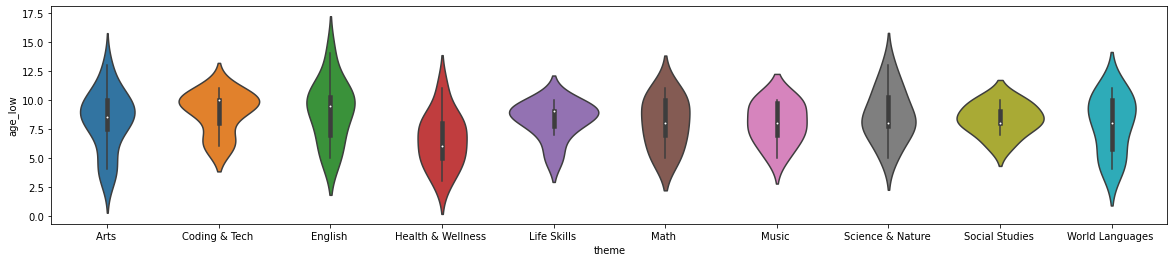

In [165]:
g = sns.violinplot(x="theme", y="age_low", data=df)
g.figure.set_figwidth(20)

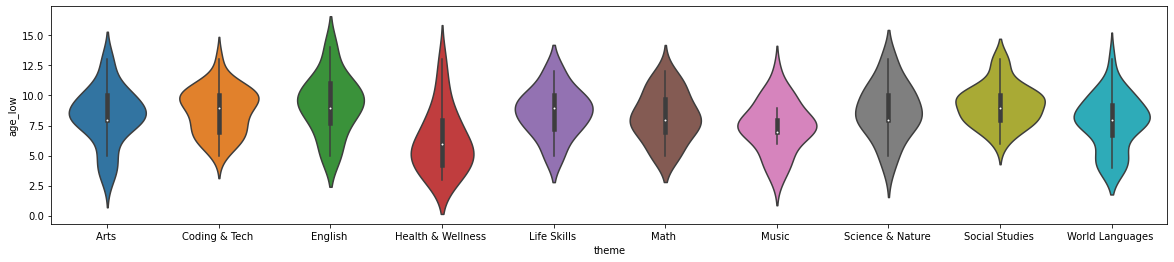

In [186]:
g = sns.violinplot(x="theme", y="age_low", data=df)
g.figure.set_figwidth(20)


In [195]:
# 파일로 저장하기
df.to_excel("outschool_list.xlsx", index=False, header=False)
df.to_csv("outschool_list.csv", index=False, header=False)

In [56]:
# 드라이버 종료
chrome.quit()